<a href="https://colab.research.google.com/github/priyanshu3042/Student_ExamScore_Prediction_Project/blob/main/Untitled23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:


,hours_studied,previous_scores,attendance,final_score
0,7,74,76,50.97
1,4,76,61,58.01
2,8,86,61,40.71
3,5,53,87,47.60
4,7,42,82,41.58


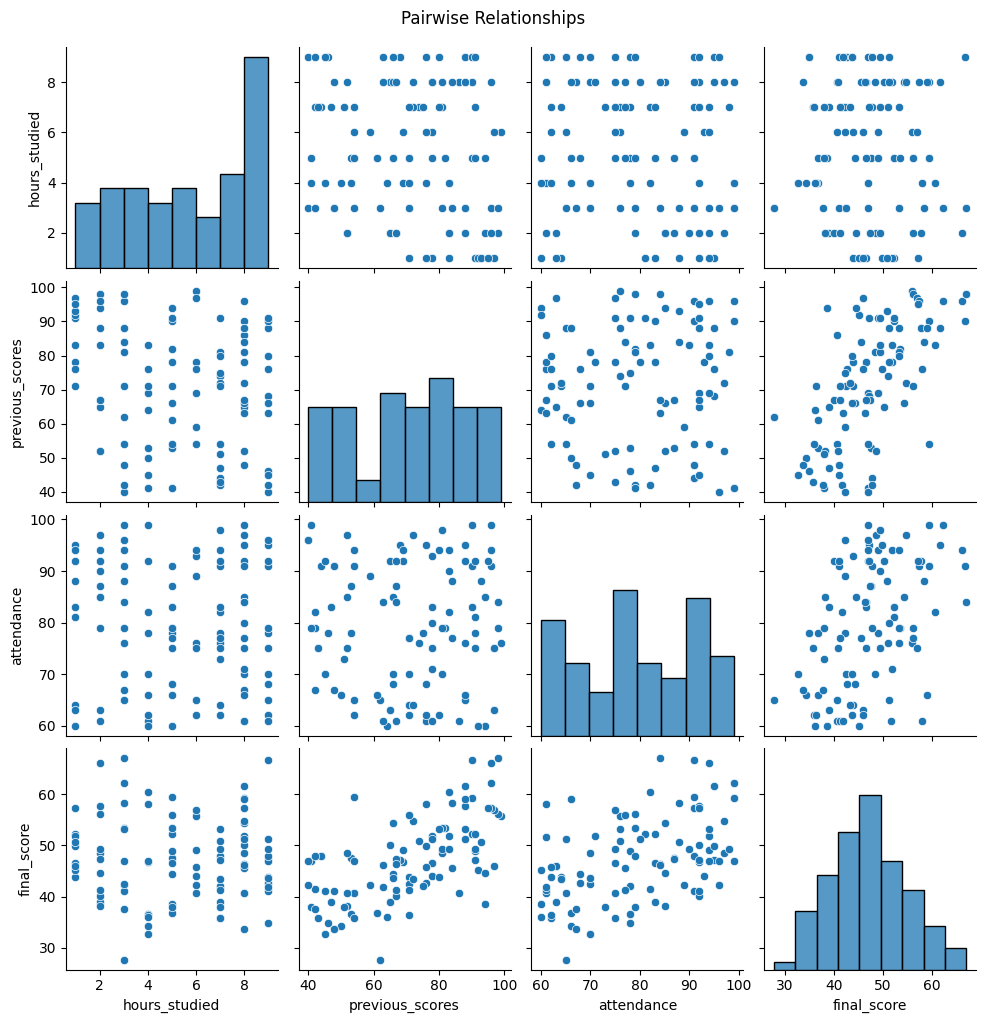

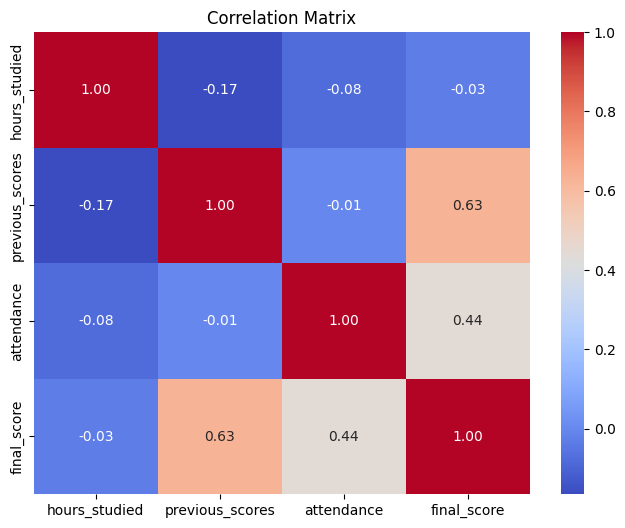


Model Evaluation:
Mean Squared Error (MSE): 22.00
R² Score: 0.68


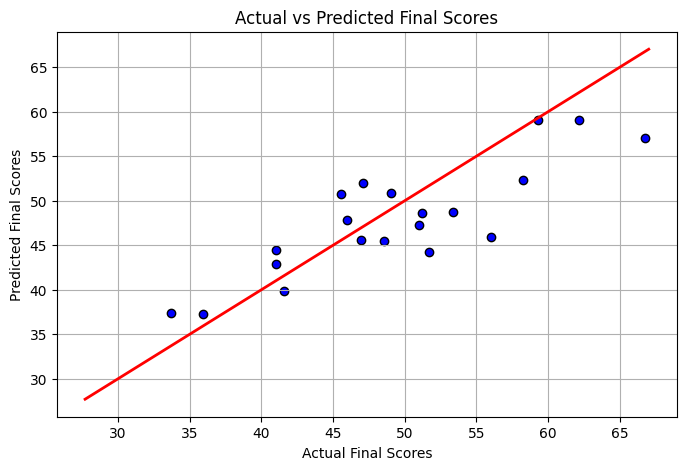

In [1]:
# Install dependencies
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(42)
data = pd.DataFrame({
    'hours_studied': np.random.randint(1, 10, 100),
    'previous_scores': np.random.randint(40, 100, 100),
    'attendance': np.random.randint(60, 100, 100)
})

# Final score = weighted sum + some noise
data['final_score'] = (
    0.4 * data['hours_studied'] +
    0.3 * data['previous_scores'] +
    0.3 * data['attendance'] +
    np.random.normal(0, 5, 100)
).round(2)

# Show the first few rows
print("Sample Data:")
display(data.head())

sns.pairplot(data)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

X = data[['hours_studied', 'previous_scores', 'attendance']]
y = data['final_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel('Actual Final Scores')
plt.ylabel('Predicted Final Scores')
plt.title('Actual vs Predicted Final Scores')
plt.grid(True)
plt.show()
